**IMPORTS**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhadramohit/world-bank-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.96k/4.96k [00:00<00:00, 5.10MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/bhadramohit/world-bank-dataset/versions/1


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

**DATASET**

In [ ]:


# Load CSV file after downloading
csv_file_path = os.path.join(path, "world_bank_dataset.csv")

# Read dataset
df = pd.read_csv(csv_file_path)

# Check data quickly
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   GDP (USD)                               200 non-null    float64
 3   Population                              200 non-null    float64
 4   Life Expectancy                         200 non-null    float64
 5   Unemployment Rate (%)                   200 non-null    float64
 6   CO2 Emissions (metric tons per capita)  200 non-null    float64
 7   Access to Electricity (%)               200 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.6+ KB
None
  Country  Year     GDP (USD)   Population  Life Expectancy  \
0  Brazil  2010  1.493220e+12  829020000.0             66.7   
1   Japan  2

**Average Access to Electricity (%) by Country (2010–2019)**

In [ ]:
import plotly.express as px

# Step 1: Filter for years 2010 to 2019
df_filtered = df[(df['Year'] >= 2010) & (df['Year'] <= 2019)]

# Step 2: Group by Country (and optionally Income Level), and calculate average
if 'Income Level' in df.columns:
    df_avg = df_filtered.groupby(['Country', 'Income Level'])['Access to Electricity (%)'].mean().reset_index()
else:
    df_avg = df_filtered.groupby('Country')['Access to Electricity (%)'].mean().reset_index()

# Step 3: Sort by Access to Electricity descending
df_avg = df_avg.sort_values(by='Access to Electricity (%)', ascending=False)

# Step 4: Create the bar chart
fig = px.bar(
    df_avg,
    x='Country',
    y='Access to Electricity (%)',
    color='Income Level' if 'Income Level' in df_avg.columns else None,
    title='Average Access to Electricity (%) by Country (2010–2019)'
)

# Step 5: Configure layout for scroll and proper y-axis scaling
fig.update_layout(
    xaxis={'categoryorder': 'total descending'},
    xaxis_tickangle=-45,
    yaxis=dict(
        title='Access to Electricity (%)',
        range=[0, 100],
        dtick=10
    ),
    width=1800,
    height=600
)

fig.show()


**Average CO₂ Emissions per Capita by Country (2010–2019)**

In [ ]:
import plotly.express as px
import pandas as pd

# Define your ranges
bins = {
    "2010-2013": (2010, 2013),
    "2013-2016": (2013, 2016),
    "2016-2019": (2016, 2019)
}

# Prepare the averaged data
df_ranges = []
for label, (start_year, end_year) in bins.items():
    temp = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    temp = temp.groupby('Country')['CO2 Emissions (metric tons per capita)'].mean().reset_index()
    temp['Range'] = label
    df_ranges.append(temp)

# Combine into one dataframe
df_all = pd.concat(df_ranges, ignore_index=True)

# Find global min and max for color scale
global_min = df_all['CO2 Emissions (metric tons per capita)'].min()
global_max = df_all['CO2 Emissions (metric tons per capita)'].max()

# Create the choropleth
fig = px.choropleth(
    df_all,
    locations="Country",
    locationmode="country names",
    color="CO2 Emissions (metric tons per capita)",
    hover_name="Country",
    color_continuous_scale="Viridis",
    animation_frame="Range",
    range_color=(global_min, global_max),   # <<< THIS locks the color scale
    title="Average CO₂ Emissions per Capita by Country (2010–2019)"
)

fig.update_layout(
    coloraxis_colorbar=dict(title="CO₂ Emissions (tons per capita)")
)

fig.show()


**Average GDP vs Life Expectancy vs Population (2010–2019)**

In [ ]:
import plotly.express as px
import pandas as pd

# Define time bins
bins = {
    "2010-2012": (2010, 2012),
    "2013-2016": (2013, 2016),
    "2017-2019": (2017, 2019)
}

# Prepare averaged data
df_ranges = []
for label, (start_year, end_year) in bins.items():
    temp = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    temp = temp.groupby('Country')[['GDP (USD)', 'Life Expectancy', 'Population']].mean().reset_index()
    temp['Range'] = label
    df_ranges.append(temp)

# Combine
df_all = pd.concat(df_ranges, ignore_index=True)

# Create scatter plot
fig = px.scatter(
    df_all,
    x="GDP (USD)",
    y="Life Expectancy",
    size="Population",
    color="Country",
    hover_name="Country",
    log_x=True,
    size_max=60,
    animation_frame="Range",   # <<< Dropdown to switch periods
    title="Average GDP vs Life Expectancy vs Population (2010–2019)"
)

fig.update_layout(
    xaxis_title="GDP (USD, Log Scale)",
    yaxis_title="Life Expectancy (Years)"
)

fig.show()


**Life Expectancy, Unemployment Rate, Access to Electricity in different countries**

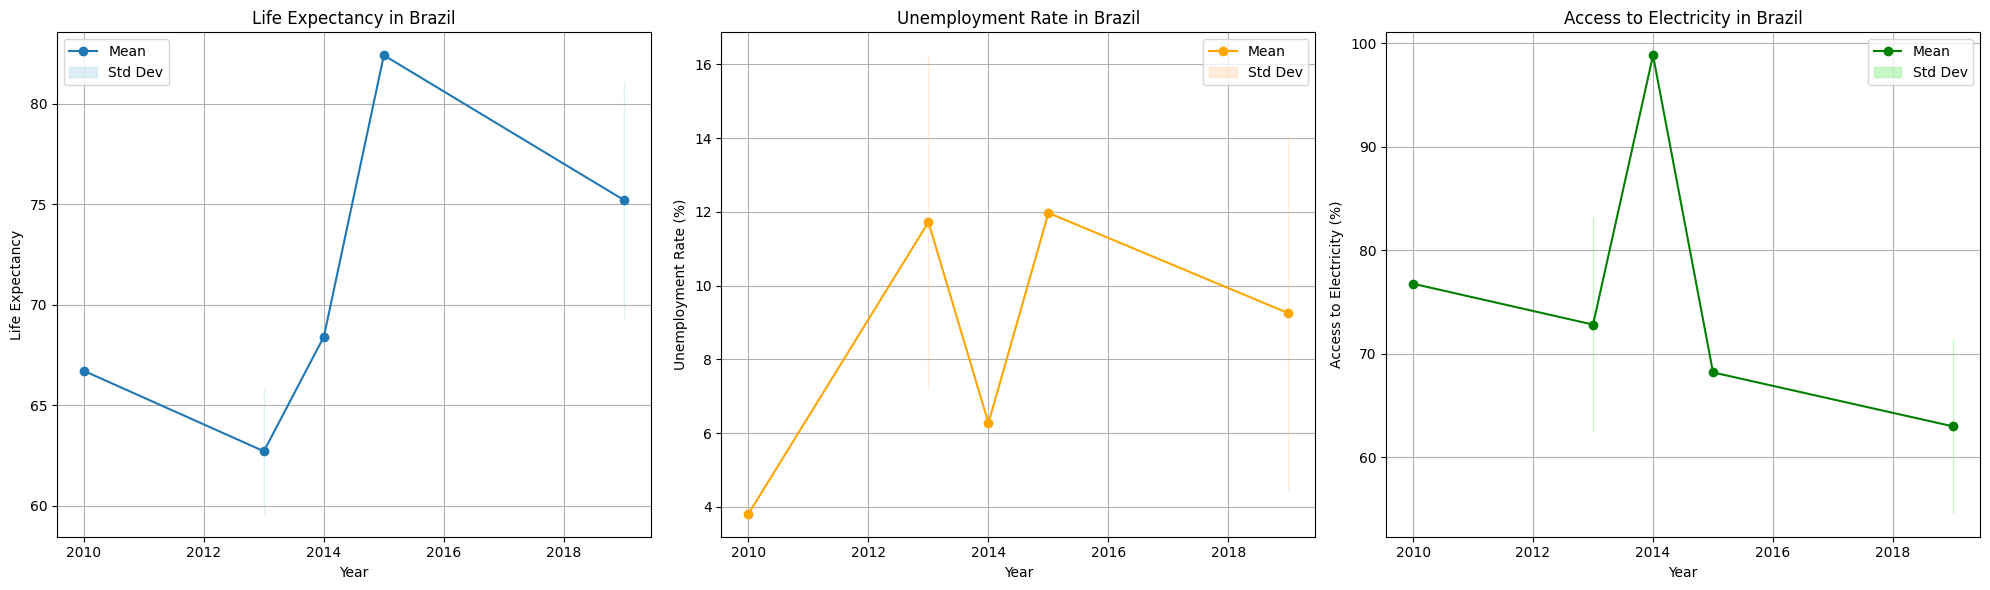

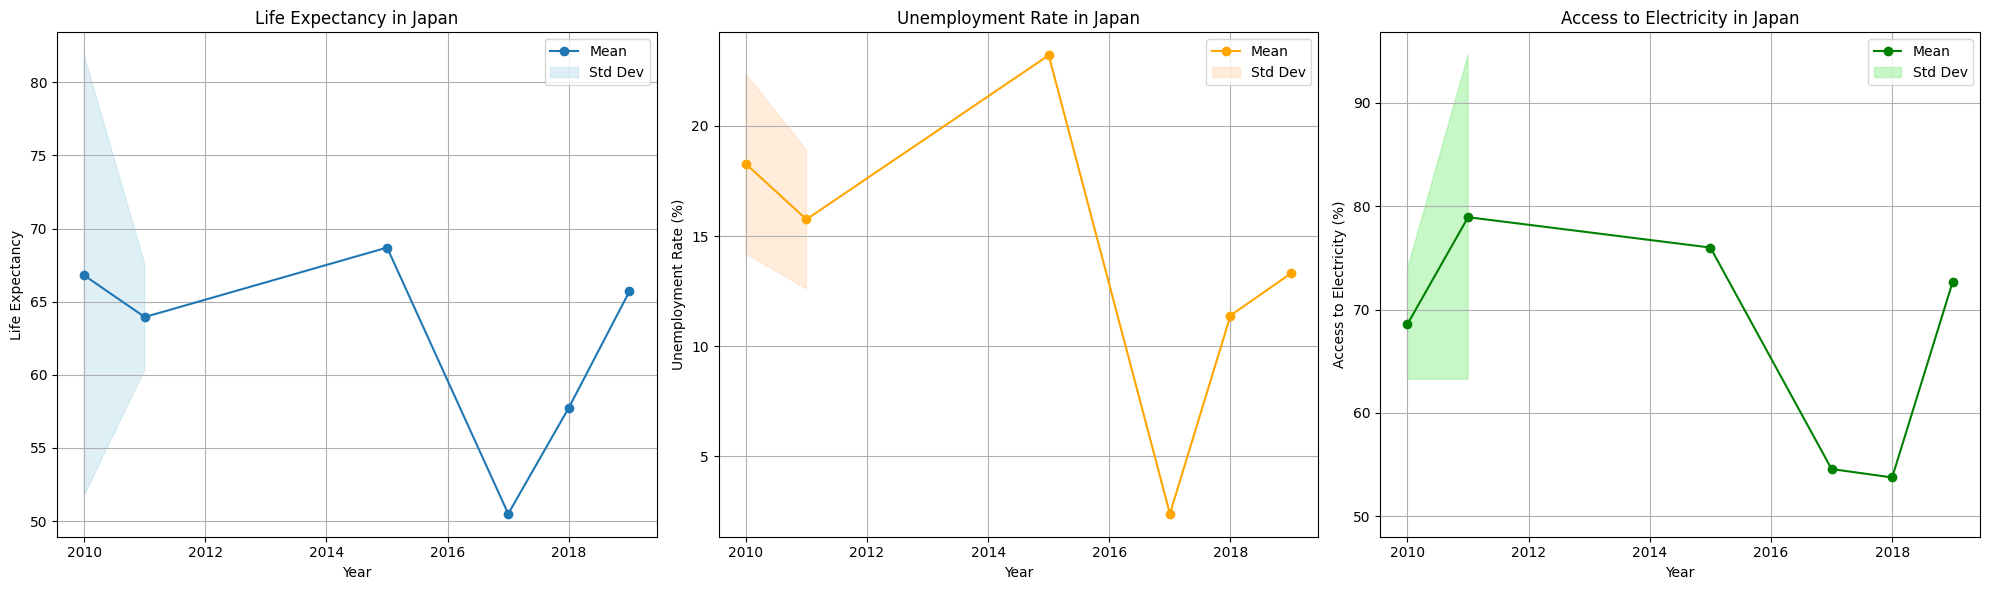

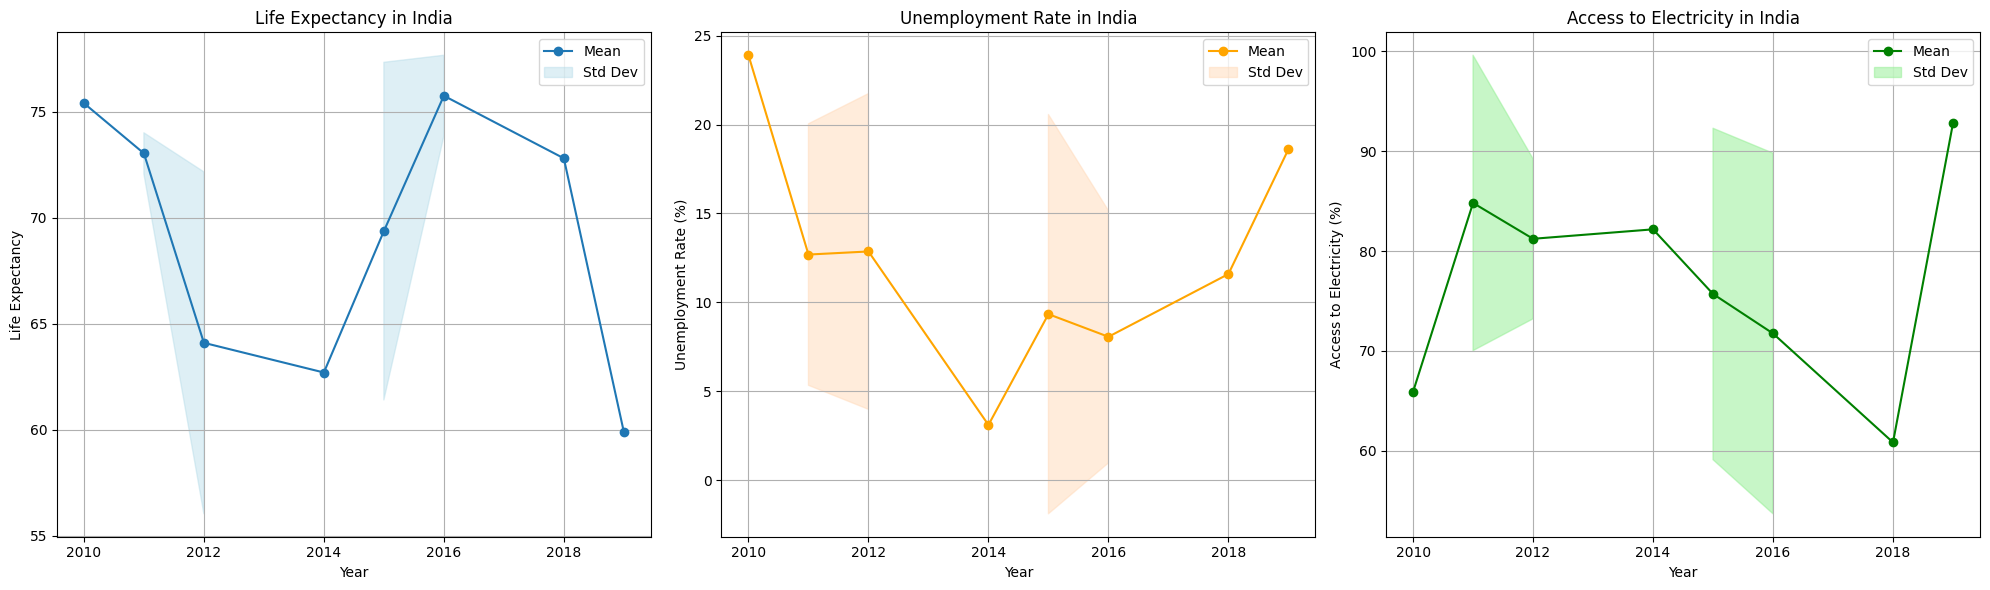

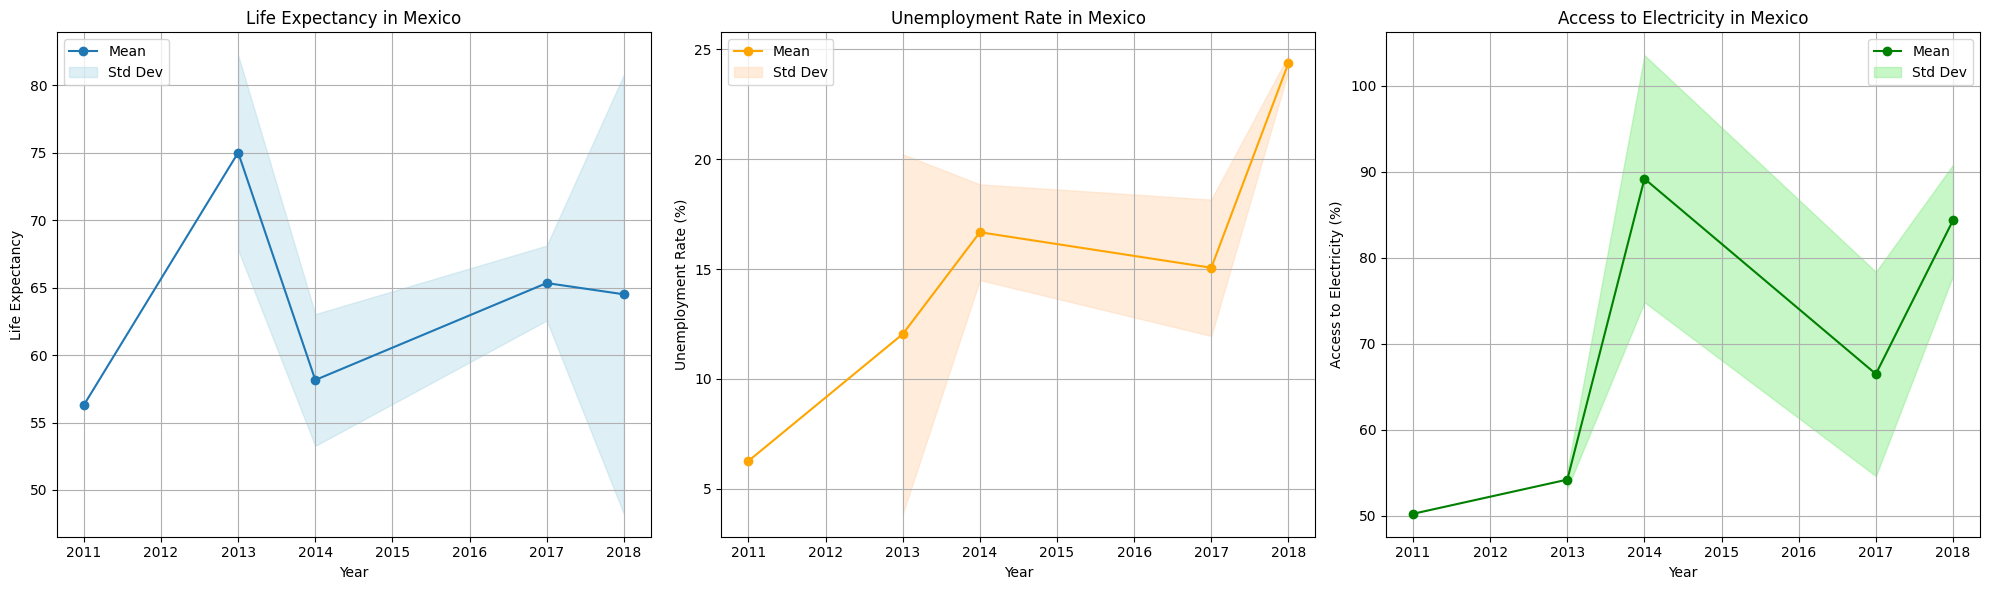

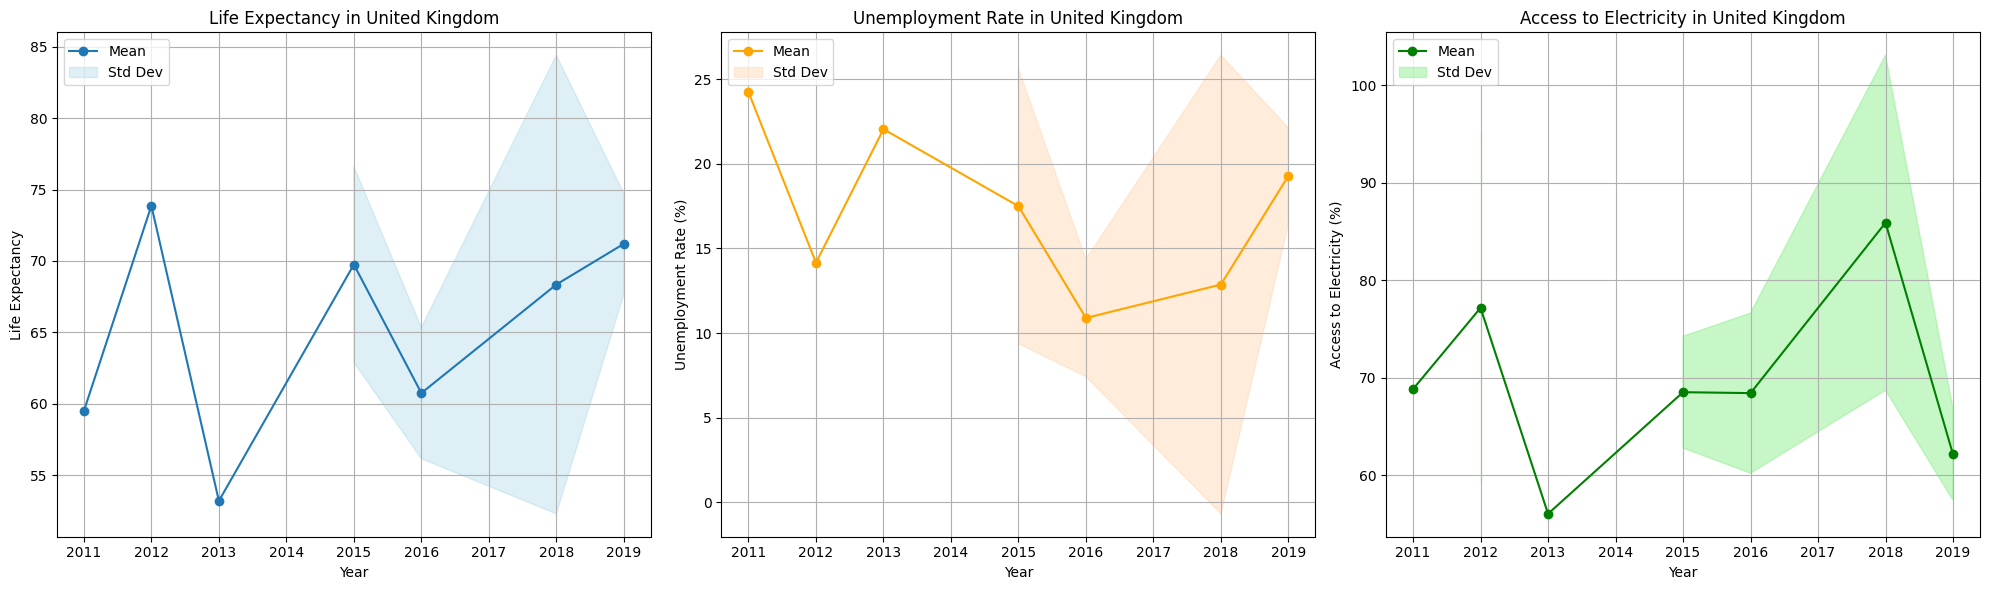

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_small_multiples_with_band(df, country):
    country_data = df[df['Country'] == country]

    # Group by year and calculate mean and std
    grouped = country_data.groupby('Year').agg({
        'Life Expectancy': ['mean', 'std'],
        'Unemployment Rate (%)': ['mean', 'std'],
        'Access to Electricity (%)': ['mean', 'std']
    }).reset_index()

    # Flatten MultiIndex columns
    grouped.columns = ['Year', 'Life Expectancy Mean', 'Life Expectancy Std',
                       'Unemployment Rate Mean', 'Unemployment Rate Std',
                       'Electricity Access Mean', 'Electricity Access Std']

    # Sort by Year
    grouped = grouped.sort_values('Year')

    # Start plotting
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # --- Life Expectancy ---
    axes[0].plot(grouped['Year'], grouped['Life Expectancy Mean'], marker='o', label='Mean')
    axes[0].fill_between(grouped['Year'],
                         grouped['Life Expectancy Mean'] - grouped['Life Expectancy Std'],
                         grouped['Life Expectancy Mean'] + grouped['Life Expectancy Std'],
                         color='lightblue', alpha=0.4, label='Std Dev')
    axes[0].set_title(f'Life Expectancy in {country}')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Life Expectancy')

    # --- Unemployment Rate ---
    axes[1].plot(grouped['Year'], grouped['Unemployment Rate Mean'], marker='o', color='orange', label='Mean')
    axes[1].fill_between(grouped['Year'],
                         grouped['Unemployment Rate Mean'] - grouped['Unemployment Rate Std'],
                         grouped['Unemployment Rate Mean'] + grouped['Unemployment Rate Std'],
                         color='peachpuff', alpha=0.5, label='Std Dev')
    axes[1].set_title(f'Unemployment Rate in {country}')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Unemployment Rate (%)')

    # --- Access to Electricity ---
    axes[2].plot(grouped['Year'], grouped['Electricity Access Mean'], marker='o', color='green', label='Mean')
    axes[2].fill_between(grouped['Year'],
                         grouped['Electricity Access Mean'] - grouped['Electricity Access Std'],
                         grouped['Electricity Access Mean'] + grouped['Electricity Access Std'],
                         color='lightgreen', alpha=0.5, label='Std Dev')
    axes[2].set_title(f'Access to Electricity in {country}')
    axes[2].set_xlabel('Year')
    axes[2].set_ylabel('Access to Electricity (%)')

    # Final touches
    for ax in axes:
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Plot for first 5 countries
countries_to_plot = df['Country'].unique()[:5]
for country in countries_to_plot:
    plot_small_multiples_with_band(df, country)

**Correlation Heat Map for all the different values**

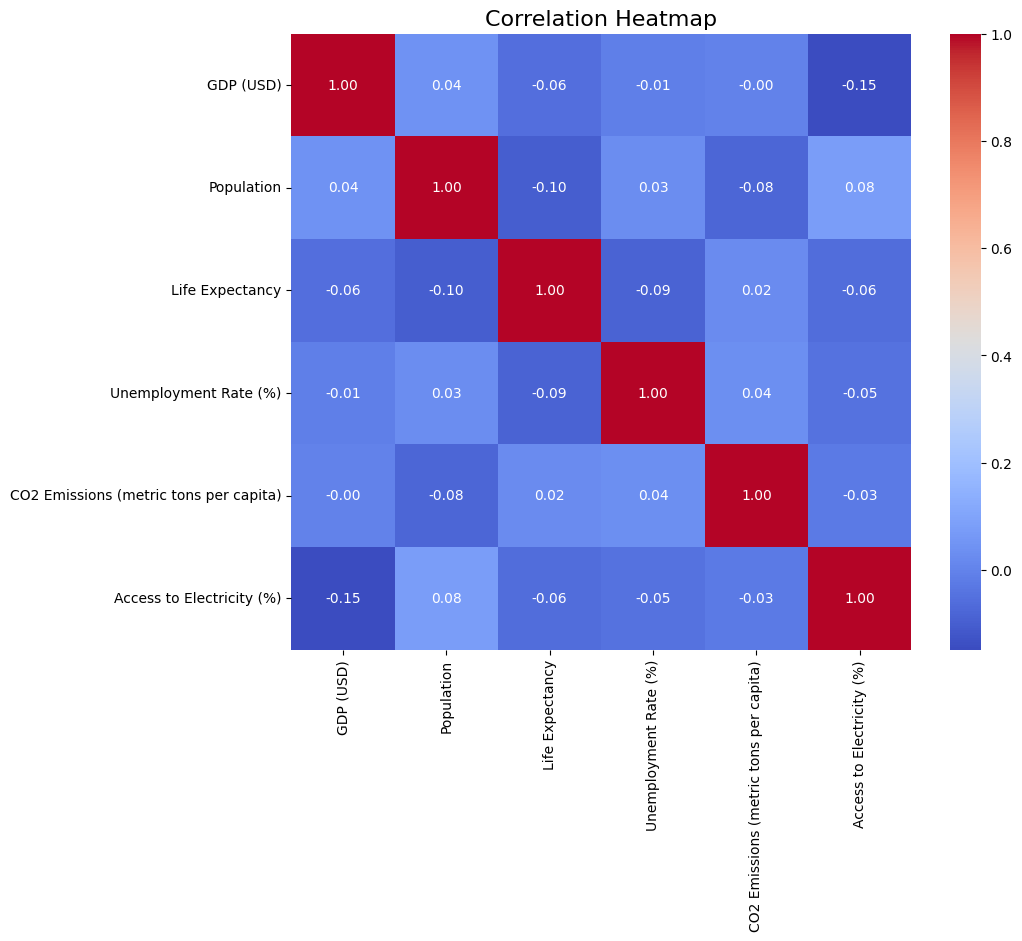

In [ ]:
#Correlation Heat Map for all the different values
plt.figure(figsize=(10, 8))

correlation = df[['GDP (USD)', 'Population', 'Life Expectancy', 'Unemployment Rate (%)',
                  'CO2 Emissions (metric tons per capita)', 'Access to Electricity (%)']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

**Correlation between GDP and Access to Electricity**

In [ ]:
#plot of correlation for access to electricity and gdp with countries names as data points

import plotly.express as px

# Recalculate df_average here to ensure it's defined in this cell's scope
df_average = df[(df['Year'] >= 2017) & (df['Year'] <= 2019)].groupby('Country')[['GDP (USD)', 'Access to Electricity (%)']].mean().reset_index()

# Assuming df_average is your DataFrame with 'GDP (USD)', 'Access to Electricity (%)', and 'Country' columns.
fig = px.scatter(
    df_average,
    x="GDP (USD)",
    y="Access to Electricity (%)",
    text="Country",  # Use country names as data points
    title="Correlation between GDP and Access to Electricity",
    labels={"GDP (USD)": "GDP (USD)", "Access to Electricity (%)": "Access to Electricity (%)"},
)

fig.update_traces(textposition="top center") # Adjust text position if needed
fig.show()

**3D scatter plot: CO₂ Emissions, Life Expectancy, Population**

In [ ]:
# prompt: Make a 3D scatter plot where:
# x = GDP
# y = CO₂ Emissions
# z = Life Expectancy
# color = Population size

import plotly.express as px

# Recalculate df_average to include CO2 Emissions (metric tons per capita)
df_average = df[(df['Year'] >= 2017) & (df['Year'] <= 2019)].groupby('Country')[['GDP (USD)', 'Life Expectancy', 'Population', 'CO2 Emissions (metric tons per capita)']].mean().reset_index()

# Assuming 'df_average' is your DataFrame with 'GDP (USD)', 'CO2 Emissions (metric tons per capita)', 'Life Expectancy', and 'Population' columns.

fig = px.scatter_3d(
    df_average,
    x='GDP (USD)',
    y='CO2 Emissions (metric tons per capita)', # Now this column should be present
    z='Life Expectancy',
    color='Population',
    hover_name='Country',
    title='GDP vs CO₂ Emissions vs Life Expectancy',
    labels={'GDP (USD)': 'GDP', 'CO2 Emissions (metric tons per capita)': 'CO₂ Emissions', 'Life Expectancy': 'Life Expectancy', 'Population': 'Population Size'}
)

fig.update_traces(marker=dict(size=5)) # Adjust marker size if necessary
fig.show()